In [ ]:
from dotenv import load_dotenv
import os 
load_dotenv()
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")


In [3]:
from google import genai
from google.genai import types

client=genai.Client(api_key=GOOGLE_API_KEY)



In [4]:
MODEL_ID="gemini-2.0-flash-exp"

In [5]:

import requests
import mimetypes
import os

In [6]:
from IPython.display import display, Markdown, Image
import pathlib


def display_response(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      print(mime)
      data = part.inline_data.data
      display(Image(data=data))

def save_image(response, path):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      continue
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      data = part.inline_data.data
      pathlib.Path(path).write_bytes(data)

image/png


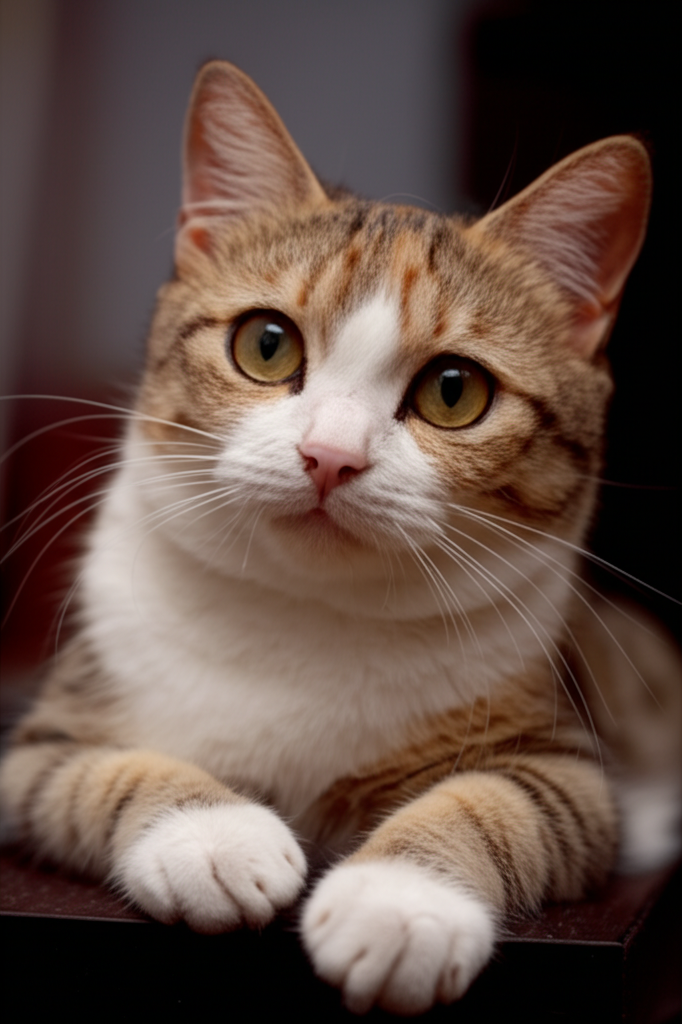

In [8]:
contents = 'genrate the image of a cat'

response = client.models.generate_content(
    model=MODEL_ID,
    contents=contents,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

display_response(response)
save_image(response, 'flying_pig.png')

image/png


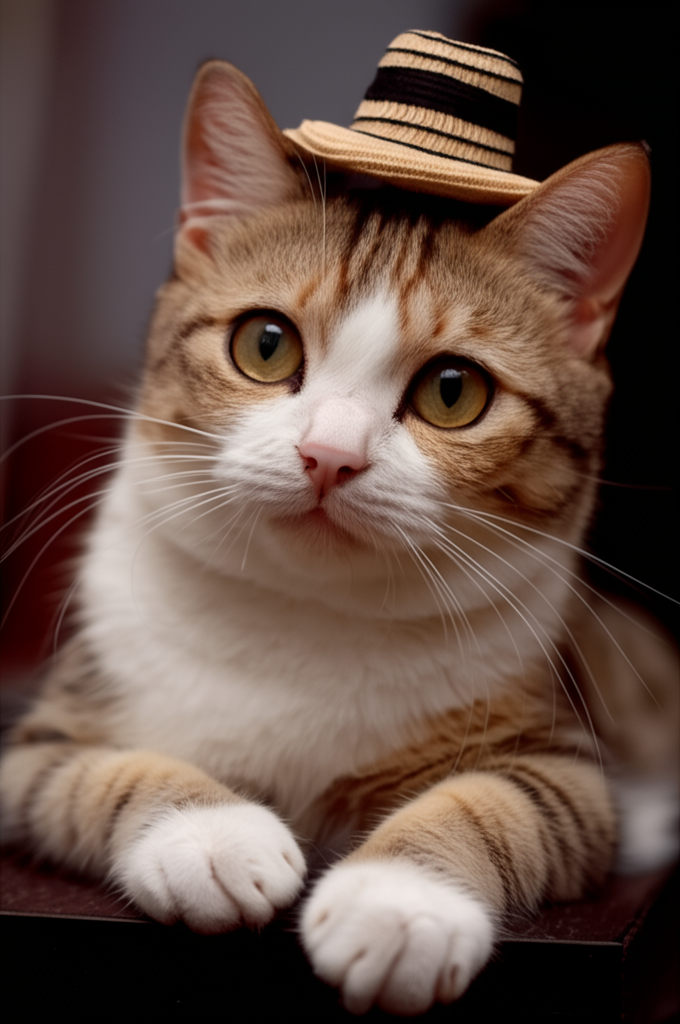

In [10]:
import PIL

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        "Hey, make the cat towear hat?",
        PIL.Image.open('flying_pig.png')
    ],
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

display_response(response)
save_image(response, 'flying_cat.png')